
# 103088 - Massive Data Processing

## Prediction of the stars of the reviews of a business


### Summary
1. [Introduction](#introduction)
2. [Goals](#goals)
3. [Possible obstacles](#possible-obstacles)
4. [Stakeholders](#stakeholders)
5. [Technical requirements](#technical-requirements)
6. [Source code](#source-code)
  * [Data pre-analysis and pre-processing](#data-pre-processing-analysis)
  * [Data analysis](#data-analysis)
  * [Data processing](#data-processing)
  * [Machine Learning Model](#ml)
7. [Conclusions](#conclusions)
8. [References](#references)

<a name="introduction"></a>
## Introduction

* In today's dynamic business landscape, understanding the intricate relationship between a business's characteristics and its performance is crucial for informed decision-making and sustainable growth. This endeavor requires a comprehensive approach that leverages advanced technologies, and in this context, we aim to enhance customer experience and streamline business operations through the implementation of a Machine Learning (ML) model.

* We seek to examine the correlation between a business's location, category, and its performance metrics, such as star ratings and review counts to predict the number of stars that business will have. This analysis aims to unveil insights into which types of businesses thrive in specific states in USA, providing valuable information for strategic planning and market positioning.

* One of the key objectives is to develop a predictive model that anticipates the star rating a company is likely to receive based on its unique characteristics. This predictive capability not only enables businesses to proactively manage and enhance their reputation but also empowers stakeholders, particularly investors, to make more informed decisions by understanding the inherent risks associated with a particular company.

* However, the journey toward achieving these objectives is not without its challenges. We must grapple with ensuring the quality and completeness of our data, addressing potential inaccuracies and gaps that could impact the reliability of our analysis.

<p align="center">
<img src="images/goals.jpeg" alt="drawing" width="400"/>
</p>



<a name="goals"></a>
## Goals

### Business Performance Analysis:

* Objective: Examine the relationship between a business's location, category, and its performance indicators, such as star ratings and review counts by understanding how various business characteristics influence performance, the analysis aims to provide insights into which types of businesses excel in specific areas or regions. This information is vital for strategic decision-making, helping businesses optimize their offerings based on the unique attributes of their operating environment.

### Prediction of Business Ratings:

* Objective: Develop a predictive model to estimate the star rating a company is likely to receive based on its characteristics. The ability to predict a business's rating in advance is a powerful tool for managing and enhancing reputation. It allows businesses to proactively address potential issues, improve customer satisfaction, and maintain a positive online presence. Additionally, this prediction model serves as a risk detection mechanism, providing stakeholders, especially investors, with valuable insights into the potential performance of a business.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1mnU7C7f_xJBdDvvalOQdZR4UFe93Ga2h" alt="drawing" width="400"/>
</p>

<a name="possible-obstacles"></a>
## Possible obstacles

### Data Quality and Completeness

* Ensuring the data used for analysis is accurate, consistent, and complete. Inaccurate data could lead to flawed insights and incorrect conclusions.
Incomplete data may result in gaps, limiting the scope and reliability of the analysis.

* RAM Limitations: Ensure that the system has enough RAM to handle the dataset. If the dataset is larger than available RAM, consider processing it in chunks or using techniques like data sampling.

* Analyzing a large dataset requires significant processing power. Ensure that the computer or server has sufficient CPU and memory resources to handle the size of the dataset. Consider using distributed computing frameworks like Apache Spark for parallel processing.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1MgfOIU8GMo6mfhZPCUa1-BAVOzemwyfY" alt="drawing" width="400"/>
</p>

<a name="stakeholders"></a>
## Stakeholders

The stakeholders involved in this initiative span from business owners concerned about return on investment (ROI) and implementation costs to the marketing team relying on accurate data for targeted campaigns. Additionally, investors keenly await the predictive ratings, understanding that these insights directly influence their investment decisions.

So we can classify them into three groups.

* Business Owners: Concerned about ROI and implementation costs.
* Marketing Team: Requires accurate data for targeted campaigns.
* Investors: The predicted ratings can directly impact their investment decisions.


<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1AV3NtKGnGrWg967lu9FiAKB7wEjhrPe9" alt="drawing" width="400"/>
</p>

<a name="technical-requirements"></a>
## Technical requirements

### 1. Define and Examine Data Sources:

* Data Source: The current JSON dataset with business information.
* Data Validation: Ensure data quality and handle missing or inconsistent data.

### 2. Working with the Data:

* Data Analysis: Perform exploratory data analysis to understand trends and patterns.
* Data Processing: Clean, transform, and structure data for analysis.
* Data Visualization: Create visualizations to present insights to stakeholders.
* Machine Learning: Apply predictive models for customer behavior prediction or recommendation systems.

<a name="source-code"></a>
## Source code

<a name="data-pre-processing-analysis"></a>
## Data pre-analysis and pre-processing

Python libraries installation and imports

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pyspark
!pip install ipython-autotime
%load_ext autotime
import pyspark.sql
import math
import pyspark
import itertools
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import type_of_target
from pyspark.ml.evaluation import RegressionEvaluator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 51 s (started: 2023-12-27 08:37:36 +00:00)


Upload of datasets

In [ ]:
drive.mount('/content/drive')

file_path_business = "/content/drive/MyDrive/colab/yelp_academic_dataset_business.json"
file_path_usa = "/content/drive/MyDrive/colab/usa_state_2022.csv"

df_businesses = pd.read_json(file_path_business,lines=True)
df_usa = pd.read_csv(file_path_usa)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 11.3 s (started: 2023-12-27 08:38:27 +00:00)


We look at the content of yelp_academic_dataset_business.json

In [ ]:
df_businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


time: 45 ms (started: 2023-12-27 08:38:38 +00:00)


We look at the content of usa_state_2022.csv

In [ ]:
df_usa.head()

,state,name_state,population,average_salary
0,AL,Alabama,5074296,44930.0
1,AK,Alaska,733583,59290.0
2,AZ,Arizona,7359197,50930.0
3,AR,Arkansas,3045637,42690.0
4,CA,California,39029342,61290.0


time: 20 ms (started: 2023-12-27 08:38:38 +00:00)


We sum the total hours that a business opens per week and we count the total number of categories that each business belongs to.

In [ ]:
def parse_time(time_str):
    """
    Parse a time string in the format 'H:M' to minutes.
    """
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

def calculate_business_hours(hours_data):
    """
    Calculate the total weekly business hours from the hours data.
    """

    if hours_data is None:
        return 0

    total_minutes = 0
    for day, hours in hours_data.items():
        if '-' in hours:  # Ensure the business is open that day
            open_time, close_time = hours.split('-')
            total_minutes += parse_time(close_time) - parse_time(open_time)
    return total_minutes / 60  # Convert total minutes to hours

def count_categories(category_string):
    """
    Count the number of categories in the category string.
    """
    if pd.isna(category_string):
        return 0  # Return 0 if the category string is NaN
    categories = category_string.split(', ')
    return len(categories)

# Apply the function to create a new column
df_businesses['category_count'] = df_businesses['categories'].apply(count_categories)
df_businesses['hours_count'] = df_businesses['hours'].apply(calculate_business_hours)

time: 2.75 s (started: 2023-12-27 08:38:38 +00:00)


We filter our business dataset by businesses that contain at least one of the top 3 most repeated categories

In [ ]:
df_businesses['categories'] = df_businesses['categories'].apply(lambda x: x.split(', ') if x else [])

# Create a new DataFrame with each category in a separate row
df_categories = df_businesses['categories'].explode()

# Get the top 3 most common categories
top_categories = df_categories.value_counts().head(3).index.tolist()

# Filter the original DataFrame based on the top 10 categories
df_businesses = df_businesses[df_businesses['categories'].apply(lambda x: any(category in x for category in top_categories))]

time: 1.38 s (started: 2023-12-27 08:38:41 +00:00)


Print the Top 3 categories

In [ ]:
# Display the top 10 categories and the filtered DataFrame
print("Top 3 Categories:")
print(top_categories)

Top 3 Categories:
['Restaurants', 'Food', 'Shopping']
time: 1.2 ms (started: 2023-12-27 08:38:42 +00:00)


We create a new category that will contain the total number of attributes that each business has

In [ ]:
df_businesses['attributes_count'] = df_businesses['attributes'].apply(lambda x: len(x) if isinstance(x, dict) else 0)

time: 57.7 ms (started: 2023-12-27 08:38:42 +00:00)


<ipython-input-176-2f50ca30eebf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_businesses['attributes_count'] = df_businesses['attributes'].apply(lambda x: len(x) if isinstance(x, dict) else 0)


We print the top 2 most common attributes in the dataset

In [ ]:
# Handle missing values in 'attributes' column
df_businesses['attributes'] = df_businesses['attributes'].apply(lambda x: {} if pd.isna(x) else x)
# Identify the top 3 attributes
top_attributes = df_businesses['attributes'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else []).explode().value_counts().head(2).index.tolist()
print("Top 2 attributes:")
print(top_attributes)
# Top 3 attributes:
# ['BusinessAcceptsCreditCards', 'BusinessParking', 'RestaurantsPriceRange2']

Top 2 attributes:
['BusinessAcceptsCreditCards', 'BusinessParking']
time: 785 ms (started: 2023-12-27 08:38:42 +00:00)


We filter the businesses by the top 2 most common attributes in the dataset

In [ ]:
# Filter the DataFrame based on the top 2 attributes
df_businesses = df_businesses[df_businesses['attributes'].apply(lambda x: any(attribute in x for attribute in top_attributes))]

# Create two new columns with 1 if the row contains one of the top 2 attributes, 0 otherwise
df_businesses['business_accepts_credit_cards'] = df_businesses['attributes'].apply(lambda x: 1 if top_attributes[0] in x else 0)
df_businesses['business_parking'] = df_businesses['attributes'].apply(lambda x: 1 if top_attributes[1] in x else 0)

time: 496 ms (started: 2023-12-27 08:38:43 +00:00)


<ipython-input-178-561d46b61773>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_businesses['business_accepts_credit_cards'] = df_businesses['attributes'].apply(lambda x: 1 if top_attributes[0] in x else 0)


We merge the usa.csv dataset with the business data set to get the population and average salary and we drop the business that are not in USA

In [ ]:
df_businesses = pd.merge(df_businesses, df_usa, on='state', how='left')
df_businesses = df_businesses.dropna(subset=['population', 'average_salary'], how='all')

time: 358 ms (started: 2023-12-27 08:38:44 +00:00)


We select the columns from the DataFrame df_businesses where the data type is "object" and "number"

In [ ]:
categorical = df_businesses.select_dtypes(include = "object")
continuous = df_businesses.select_dtypes(include = "number")

time: 33.5 ms (started: 2023-12-27 08:38:44 +00:00)


We print a concise summary of the "categorical" DataFrame

In [ ]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77338 entries, 0 to 80663
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  77338 non-null  object
 1   name         77338 non-null  object
 2   address      77338 non-null  object
 3   city         77338 non-null  object
 4   state        77338 non-null  object
 5   postal_code  77338 non-null  object
 6   attributes   77338 non-null  object
 7   categories   77338 non-null  object
 8   hours        67529 non-null  object
 9   name_state   77338 non-null  object
dtypes: object(10)
memory usage: 6.5+ MB
time: 254 ms (started: 2023-12-27 08:38:44 +00:00)


In [ ]:
categorical

,business_id,name,address,city,state,postal_code,attributes,categories,hours,name_state
0,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","[Department Stores, Shopping, Fashion, Home & ...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Arizona
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Pennsylvania
2,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","[Brewpubs, Breweries, Food]","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",Pennsylvania
3,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","[Burgers, Fast Food, Sandwiches, Food, Ice Cre...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",Tennessee
4,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","[Sporting Goods, Fashion, Shoe Stores, Shoppin...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",Missouri
...,...,...,...,...,...,...,...,...,...,...
80658,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,"{'WheelchairAccessible': 'False', 'Restaurants...","[Restaurants, Mexican]","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Pennsylvania
80659,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","[Restaurants, Comfort Food, Food, Food Trucks,...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Delaware
80661,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","[Pets, Nurseries & Gardening, Pet Stores, Hobb...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...",Tennessee
80662,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","[Shopping, Jewelry, Piercing, Toy Stores, Beau...",None,Indiana


time: 27.5 ms (started: 2023-12-27 08:38:44 +00:00)


We print a concise summary of the "continuous" DataFrame

In [ ]:
continuous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77338 entries, 0 to 80663
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       77338 non-null  float64
 1   longitude                      77338 non-null  float64
 2   stars                          77338 non-null  float64
 3   review_count                   77338 non-null  int64  
 4   is_open                        77338 non-null  int64  
 5   category_count                 77338 non-null  int64  
 6   hours_count                    77338 non-null  float64
 7   attributes_count               77338 non-null  int64  
 8   business_accepts_credit_cards  77338 non-null  int64  
 9   business_parking               77338 non-null  int64  
 10  population                     77338 non-null  float64
 11  average_salary                 77338 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 7.7 MB
t

In [ ]:
continuous

,latitude,longitude,stars,review_count,is_open,category_count,hours_count,attributes_count,business_accepts_credit_cards,business_parking,population,average_salary
0,32.223236,-110.880452,3.5,22,0,6,100.0,16,1,1,7359197.0,50930.0
1,39.955505,-75.155564,4.0,80,1,5,94.0,11,1,1,12972008.0,51340.0
2,40.338183,-75.471659,4.5,13,1,3,40.0,7,1,1,12972008.0,51340.0
3,36.269593,-87.058943,2.0,6,1,6,66.0,23,1,1,7051339.0,45650.0
4,38.627695,-90.340465,2.5,13,1,6,46.0,4,1,1,6177957.0,47820.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80658,39.935982,-75.158665,4.5,35,1,2,26.0,20,1,1,12972008.0,51340.0
80659,39.856185,-75.427725,4.5,14,1,6,0.0,10,1,1,1018396.0,54370.0
80661,36.115118,-86.766925,4.0,5,1,7,64.0,5,1,1,7051339.0,45650.0
80662,39.908707,-86.065088,3.5,8,1,7,0.0,2,1,0,6833037.0,46770.0


time: 24.4 ms (started: 2023-12-27 08:38:44 +00:00)



We calculate the total number of records that contain "hours_count" == 0 and replace them with the average of the hours that the businesses are open

In [ ]:
zero_hours_count = df_businesses[df_businesses['hours_count'] == 0]
mean_hours_count = df_businesses['hours_count'].mean()

total_businesses_with_zero_hours = (zero_hours_count['hours_count'] == 0).sum()

print(f'Total number of records with 0 hours: {total_businesses_with_zero_hours}')
print(f'Mean hours that businesses are open during the week: {mean_hours_count}')

df_businesses['hours_count'] = df_businesses['hours_count'].replace(0, mean_hours_count)


Total number of records with 0 hours: 12027
Mean hours that businesses are open during the week: 40.72813968122613
time: 19.8 ms (started: 2023-12-27 08:38:45 +00:00)


<a name="data-analysis"></a>
## Data analysis

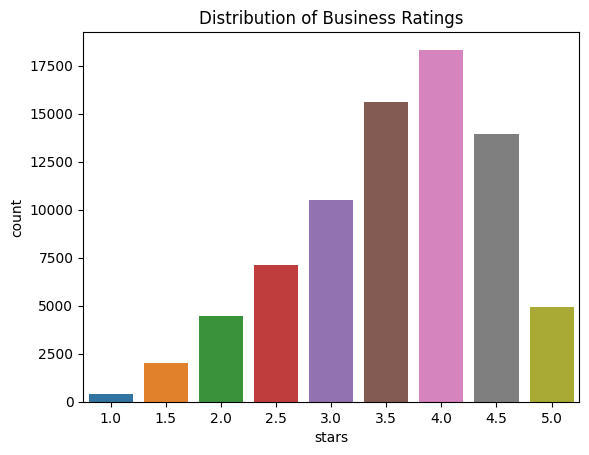

time: 438 ms (started: 2023-12-27 08:38:45 +00:00)


In [ ]:
sns.countplot(x='stars', data=df_businesses)
plt.title('Distribution of Business Ratings')
plt.show()

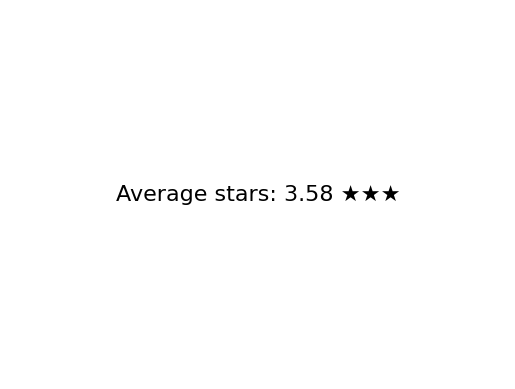

time: 93 ms (started: 2023-12-27 08:38:45 +00:00)


In [ ]:
fig, ax = plt.subplots()
mean_stars = round(df_businesses['stars'].mean(), 2)
star_emoji = '\u2605'
ax.text(0.5, 0.5, f'Average stars: {mean_stars} {star_emoji}{star_emoji}{star_emoji}', ha='center', va='center', fontsize=16)
ax.axis('off')
plt.show()

Text(0, 0.5, 'Number of Businesses')

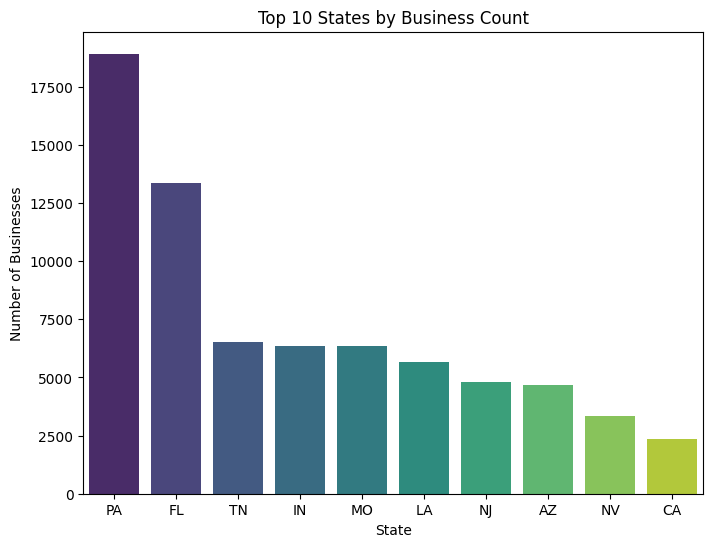

time: 1.04 s (started: 2023-12-27 08:38:45 +00:00)


In [ ]:
business_per_state = df_businesses['state'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=business_per_state.index[:10], y=business_per_state.values[:10], palette='viridis')
plt.title('Top 10 States by Business Count')
plt.xlabel('State')
plt.ylabel('Number of Businesses')

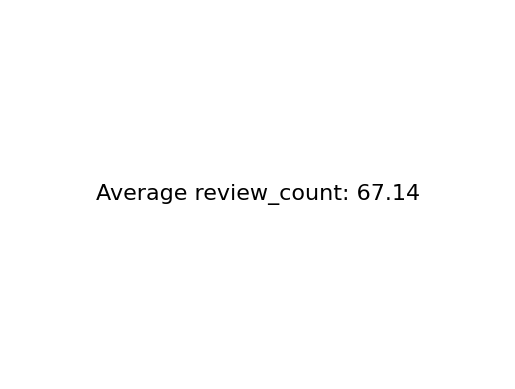

time: 181 ms (started: 2023-12-27 08:38:46 +00:00)


In [ ]:
fig, ax = plt.subplots()
mean_stars = round(df_businesses['review_count'].mean(), 2)
ax.text(0.5, 0.5, f'Average review_count: {mean_stars}', ha='center', va='center', fontsize=16)
ax.axis('off')
plt.show()

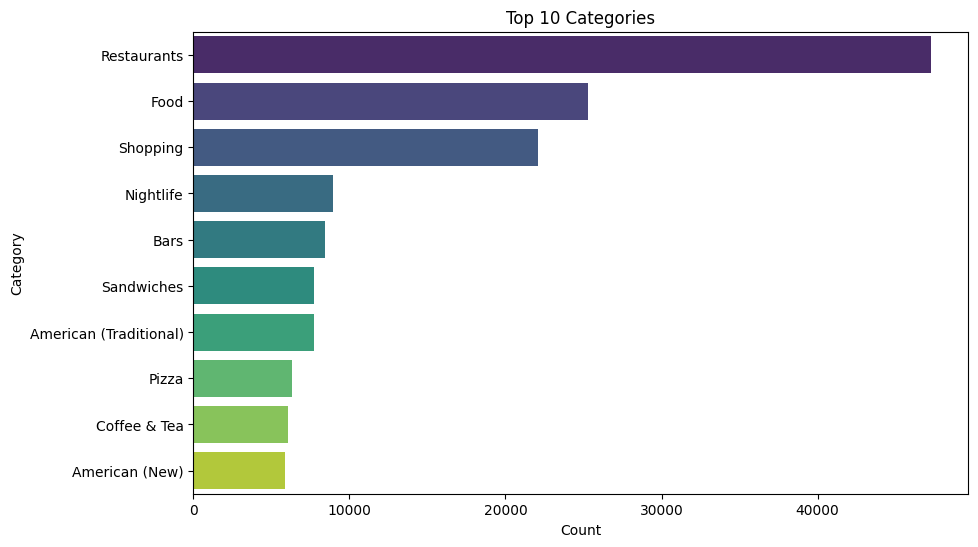

time: 1.7 s (started: 2023-12-27 08:38:46 +00:00)


In [ ]:
flat_categories = [category for sublist in df_businesses['categories'] for category in sublist]

# Create a pandas Series from the flattened list
categories_series = pd.Series(flat_categories)

# Get the top 10 categories
top_categories = categories_series.value_counts().head(10)

# Plot the top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

8713


<Figure size 1500x600 with 0 Axes>

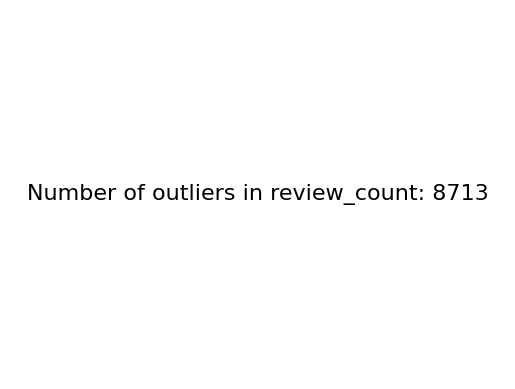

time: 1.33 s (started: 2023-12-27 08:38:48 +00:00)


In [ ]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
    return outliers
df_new = df_businesses
# Detecting outliers in 'review_count'
outliers_reviews = detect_outliers(df_new, 'review_count')
print(outliers_reviews)

# Data Quality Assessment: Checking for missing values
missing_values = df_new.isnull().mean().sort_values(ascending=False).head(10)

# Creating the dashboard
plt.figure(figsize=(15, 6))

# Plot for Outliers
fig, ax = plt.subplots()
ax.text(0.5, 0.5, f'Number of outliers in review_count: {outliers_reviews}', ha='center', va='center', fontsize=16)
ax.axis('off')
plt.show()

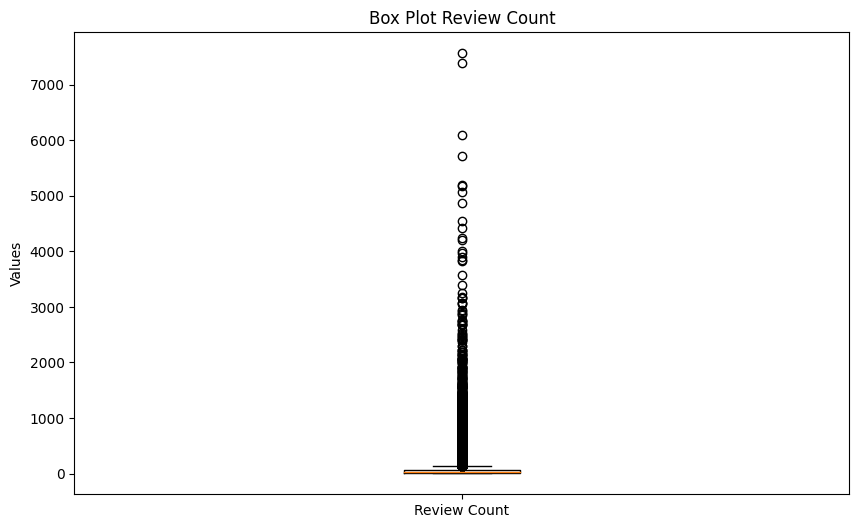

time: 727 ms (started: 2023-12-27 08:38:50 +00:00)


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot( df_businesses['review_count'], labels=[ 'Review Count'])
plt.title('Box Plot Review Count')
plt.ylabel('Values')
plt.show()

We replace outliers in the specified column with the lower and upper bounds derived from the interquartile range (IQR) method

In [ ]:
def replace_outliers_with_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with upper and lower bounds
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Assuming df_businesses is your DataFrame and 'column_name' is the column containing outliers
replace_outliers_with_bounds(df_businesses, 'review_count')

time: 233 ms (started: 2023-12-27 08:38:50 +00:00)


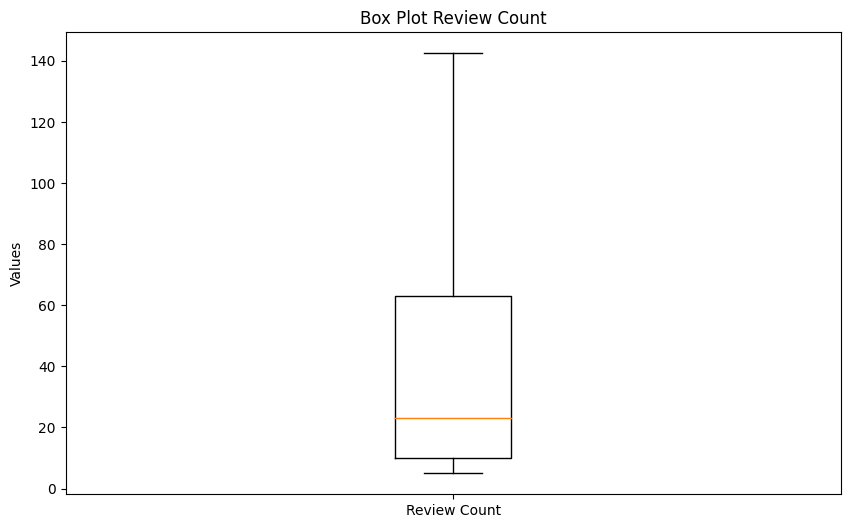

time: 907 ms (started: 2023-12-27 08:38:51 +00:00)


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot( df_businesses['review_count'], labels=[ 'Review Count'])
plt.title('Box Plot Review Count')
plt.ylabel('Values')
plt.show()

We iterate through each column in a DataFrame (df_businesses) and check if there are any missing (null or NaN) values in each column. If a column has missing values, we print a message indicating the column name and the number of missing values

In [ ]:
for column in df_businesses:
  if df_businesses[column].isnull().sum() > 0:
    print("Column " + df_businesses[column].name + " has " + str(df_businesses[column].isnull().sum()) + " missing values.")

Column hours has 9809 missing values.
time: 489 ms (started: 2023-12-27 08:38:51 +00:00)


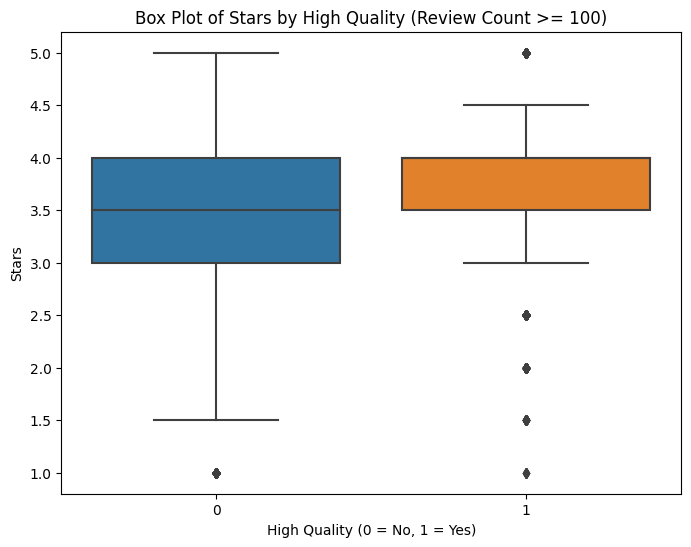

time: 1.05 s (started: 2023-12-27 08:38:52 +00:00)


In [ ]:
df_businesses['high_quality'] = (df_businesses['review_count'] >= 100).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_businesses['high_quality'], y=df_businesses['stars'])
plt.title('Box Plot of Stars by High Quality (Review Count >= 100)')
plt.xlabel('High Quality (0 = No, 1 = Yes)')
plt.ylabel('Stars')
plt.show()

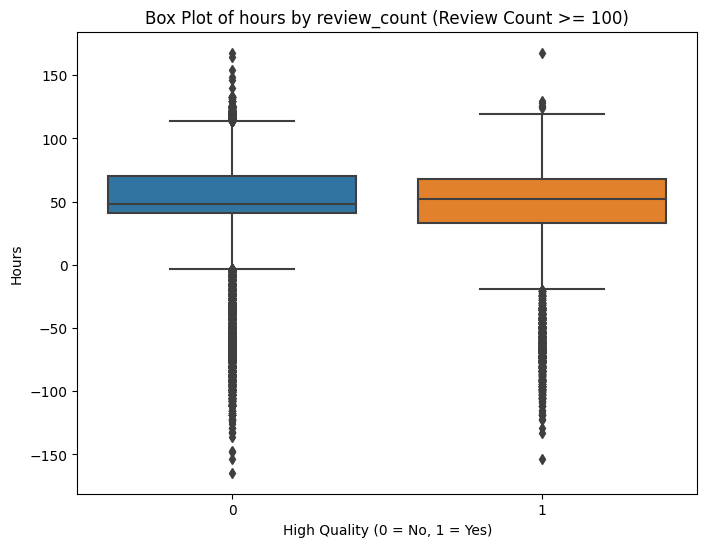

time: 620 ms (started: 2023-12-27 08:38:53 +00:00)


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_businesses['high_quality'], y=df_businesses['hours_count'])
plt.title('Box Plot of hours by review_count (Review Count >= 100)')
plt.xlabel('High Quality (0 = No, 1 = Yes)')
plt.ylabel('Hours')
plt.show()

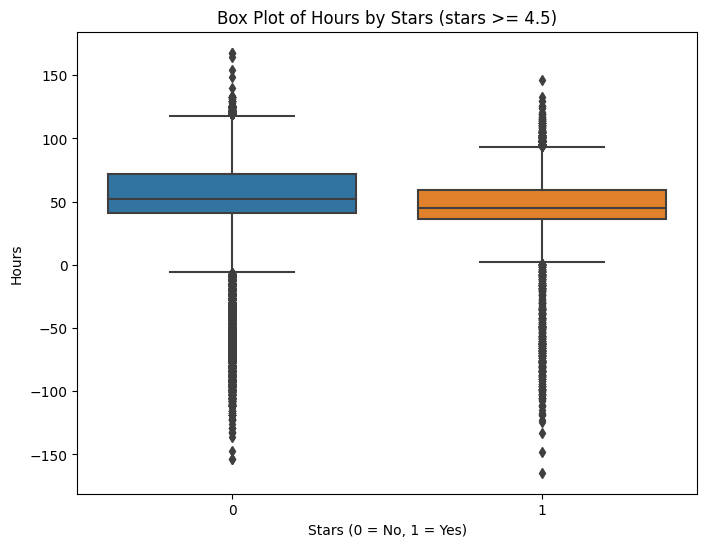

time: 509 ms (started: 2023-12-27 08:38:54 +00:00)


In [ ]:
df_businesses['high_quality'] = (df_businesses['stars'] >= 4.5).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_businesses['high_quality'], y=df_businesses['hours_count'])
plt.title('Box Plot of Hours by Stars (stars >= 4.5)')
plt.xlabel('Stars (0 = No, 1 = Yes)')
plt.ylabel('Hours')
plt.show()

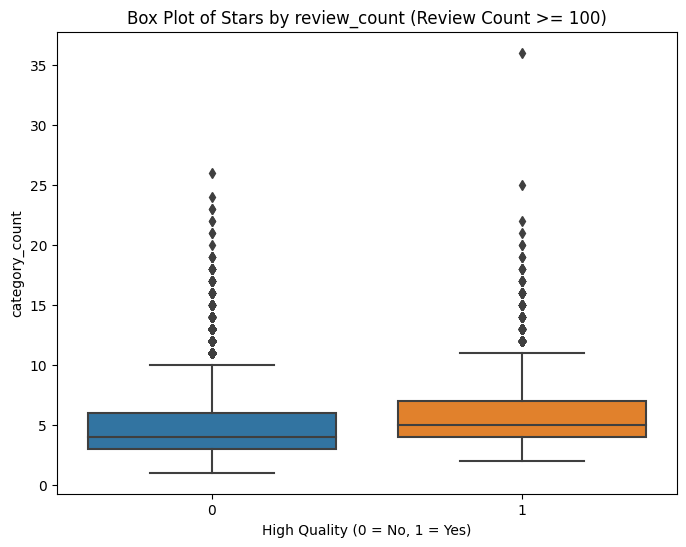

time: 535 ms (started: 2023-12-27 08:38:54 +00:00)


In [ ]:
df_businesses['high_quality'] = (df_businesses['review_count'] >= 100).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_businesses['high_quality'], y=df_businesses['category_count'])
plt.title('Box Plot of Stars by review_count (Review Count >= 100)')
plt.xlabel('High Quality (0 = No, 1 = Yes)')
plt.ylabel('category_count')
plt.show()

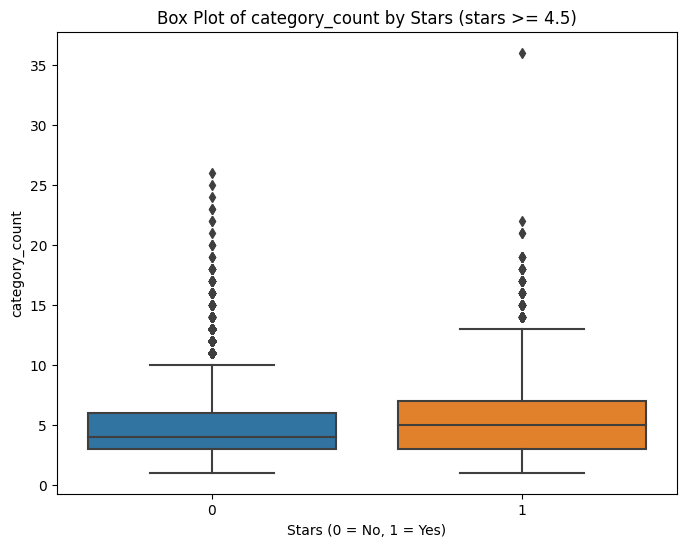

time: 554 ms (started: 2023-12-27 08:38:55 +00:00)


In [ ]:
df_businesses['high_quality'] = (df_businesses['stars'] >= 4.5).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_businesses['high_quality'], y=df_businesses['category_count'])
plt.title('Box Plot of category_count by Stars (stars >= 4.5)')
plt.xlabel('Stars (0 = No, 1 = Yes)')
plt.ylabel('category_count')
plt.show()

<a name="data-processing"></a>
## Data processing

Create sparkSession

In [ ]:
spark = SparkSession.builder \
    .appName("Large JSON Processing") \
    .config("spark.executor.heartbeatInterval", "200000")\
    .config("spark.network.timeout", "300000")\
    .config("spark.executor.memory", "47185920000") \
    .getOrCreate()

time: 47.5 ms (started: 2023-12-27 08:38:55 +00:00)


Original data set (5GB)

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1jZgWRkcoEyMar7q9k2zFQGRCgMVONSMw" alt="drawing" width="1800" height="120"/>
</p>

Upload new dataset

In [ ]:
json_file_path = '/content/drive/MyDrive/colab/yelp_academic_dataset_business_add.json'
df_add = spark.read.json(json_file_path)

time: 5.6 s (started: 2023-12-27 08:38:55 +00:00)


In [ ]:
df_add.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+----------------+----------------+-----------+------------+--------------------+-----+-----+
|             address|          attributes|         business_id|     business_id_rev|          categories|         city|               hours|is_open|     latitude|      longitude|                name|negative_reviews|positive_reviews|postal_code|review_count|review_count_reviews|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+----------------+----------------+-----------+------------+--------------------+-----+-----+
| 10359 104 Street NW|[NULL, NULL, u'be...|WKMJwqnfZKsAae75R...|WKMJwqnfZKsAae75R...|Coffee & Tea, Foo...|     Edmonton|[

We drop the column review_count, as we saw that it has incorrect values and we replace it for our review count.

In [ ]:
df_add.drop("review_count")

DataFrame[address: string, attributes: array<string>, business_id: string, business_id_rev: string, categories: string, city: string, hours: array<string>, is_open: bigint, latitude: double, longitude: double, name: string, negative_reviews: bigint, positive_reviews: bigint, postal_code: string, review_count_reviews: bigint, stars: double, state: string]

time: 50.6 ms (started: 2023-12-27 08:39:02 +00:00)


In [ ]:
df_add.withColumnRenamed("review_count_reviews", "review_count")

DataFrame[address: string, attributes: array<string>, business_id: string, business_id_rev: string, categories: string, city: string, hours: array<string>, is_open: bigint, latitude: double, longitude: double, name: string, negative_reviews: bigint, positive_reviews: bigint, postal_code: string, review_count: bigint, review_count: bigint, stars: double, state: string]

time: 59 ms (started: 2023-12-27 08:39:02 +00:00)


In [ ]:
df_add_drop = df_add[["business_id","review_count", "positive_reviews", "negative_reviews"]]

time: 28.3 ms (started: 2023-12-27 08:39:02 +00:00)


In [ ]:
df_businesses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77338 entries, 0 to 80663
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   business_id                    77338 non-null  object 
 1   name                           77338 non-null  object 
 2   address                        77338 non-null  object 
 3   city                           77338 non-null  object 
 4   state                          77338 non-null  object 
 5   postal_code                    77338 non-null  object 
 6   latitude                       77338 non-null  float64
 7   longitude                      77338 non-null  float64
 8   stars                          77338 non-null  float64
 9   review_count                   77338 non-null  float64
 10  is_open                        77338 non-null  int64  
 11  attributes                     77338 non-null  object 
 12  categories                     77338 non-null 

Creating a spark dataframe to do the join between both datasets

In [ ]:
df = spark.createDataFrame(df_businesses)

time: 32.5 s (started: 2023-12-27 08:39:02 +00:00)


In [ ]:
df.show()

+--------------------+--------------------+--------------------+-------------+-----+-----------+-------------+---------------+-----+------------+-------+--------------------+--------------------+--------------------+--------------+-----------------+----------------+-----------------------------+----------------+------------+-----------+--------------+------------+
|         business_id|                name|             address|         city|state|postal_code|     latitude|      longitude|stars|review_count|is_open|          attributes|          categories|               hours|category_count|      hours_count|attributes_count|business_accepts_credit_cards|business_parking|  name_state| population|average_salary|high_quality|
+--------------------+--------------------+--------------------+-------------+-----+-----------+-------------+---------------+-----+------------+-------+--------------------+--------------------+--------------------+--------------+-----------------+----------------+

We drop again the incorrect column on the business df and we do the join

In [ ]:
df = df.drop("review_count")

time: 27.3 ms (started: 2023-12-27 08:39:39 +00:00)


In [ ]:
df_final = df.join(df_add_drop,df.business_id == df_add_drop.business_id)

time: 31.9 ms (started: 2023-12-27 08:39:39 +00:00)


In [ ]:
df_final.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77338 entries, 0 to 77337
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   business_id                    77338 non-null  object 
 1   name                           77338 non-null  object 
 2   address                        77338 non-null  object 
 3   city                           77338 non-null  object 
 4   state                          77338 non-null  object 
 5   postal_code                    77338 non-null  object 
 6   latitude                       77338 non-null  float64
 7   longitude                      77338 non-null  float64
 8   stars                          77338 non-null  float64
 9   is_open                        77338 non-null  int64  
 10  attributes                     77338 non-null  object 
 11  categories                     77338 non-null  object 
 12  hours                          67529 non-null 

In [ ]:
df_final.show()

+--------------------+--------------------+--------------------+-------------+-----+-----------+-------------+---------------+-----+-------+--------------------+--------------------+--------------------+--------------+-----------------+----------------+-----------------------------+----------------+------------+-----------+--------------+------------+--------------------+------------+----------------+----------------+
|         business_id|                name|             address|         city|state|postal_code|     latitude|      longitude|stars|is_open|          attributes|          categories|               hours|category_count|      hours_count|attributes_count|business_accepts_credit_cards|business_parking|  name_state| population|average_salary|high_quality|         business_id|review_count|positive_reviews|negative_reviews|
+--------------------+--------------------+--------------------+-------------+-----+-----------+-------------+---------------+-----+-------+----------------

For every numerical columnn we replace the outliers to the quartile below or above depending on the outlier. This could help us to not have outliers that make our model predict incorrectly.

In [ ]:
for column in df_final.toPandas().select_dtypes(include = "number"):
    # Calculate the quartiles and IQR
    Q1 = df_final.stat.approxQuantile(column, [0.25], 0.05)[0]
    Q3 = df_final.stat.approxQuantile(column, [0.75], 0.05)[0]
    IQR = Q3 - Q1

    # Only apply outlier treatment if IQR is non-zero
    if IQR != 0:
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers in the DataFrame using Spark SQL expressions
        df_final = df_final.withColumn(column,
                          when(col(column) < lower_bound, lower_bound)
                          .when(col(column) > upper_bound, upper_bound)
                          .otherwise(col(column)))

time: 3min 14s (started: 2023-12-27 08:40:13 +00:00)


After this, we are left with only the numerical columns.

In [ ]:
df_continuous = df_final.select("*").toPandas().select_dtypes(include = "number")

time: 18.4 s (started: 2023-12-27 08:43:28 +00:00)


In [ ]:
df_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77338 entries, 0 to 77337
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       77338 non-null  float64
 1   longitude                      77338 non-null  float64
 2   stars                          77338 non-null  float64
 3   is_open                        77338 non-null  float64
 4   category_count                 77338 non-null  float64
 5   hours_count                    77338 non-null  float64
 6   attributes_count               77338 non-null  float64
 7   business_accepts_credit_cards  77338 non-null  int64  
 8   business_parking               77338 non-null  int64  
 9   population                     77338 non-null  float64
 10  average_salary                 77338 non-null  float64
 11  high_quality                   77338 non-null  int64  
 12  review_count                   77338 non-null 

We normalize the data to consider all columns equally and reduce redundancies and errors.

In [ ]:
normalized_df = (df_continuous-df_continuous.min())/(df_continuous.max()-df_continuous.min())

time: 24.9 ms (started: 2023-12-27 08:43:46 +00:00)


In [ ]:
df_continuous

,latitude,longitude,stars,is_open,category_count,hours_count,attributes_count,business_accepts_credit_cards,business_parking,population,average_salary,high_quality,review_count,positive_reviews,negative_reviews
0,39.476518,-112.125374,4.5,1.0,7.0,62.00000,9.0,1,1,3177772.0,47210.0,1,5.0,1.0,4.0
1,36.153004,-86.843328,5.0,1.0,4.0,21.00000,18.0,1,1,7051339.0,45650.0,1,18.0,0.0,18.0
2,32.271231,-110.992075,5.0,1.0,8.0,12.00000,10.0,1,1,7359197.0,50930.0,1,25.0,2.0,23.0
3,27.871828,-82.750285,2.0,1.0,3.0,103.90779,4.0,0,1,22180464.5,47750.0,0,8.0,7.0,1.0
4,39.981347,-75.132247,4.5,1.0,4.0,48.00000,10.0,1,0,12972008.0,51340.0,1,10.0,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77333,43.579898,-112.125374,3.0,0.0,4.0,40.72814,16.0,1,1,1939033.0,44890.0,0,15.0,16.0,0.0
77334,28.016453,-82.776384,4.0,1.0,3.0,47.00000,18.0,1,1,22180464.5,47750.0,0,117.5,55.0,49.0
77335,38.767990,-89.956640,2.0,0.0,6.0,66.00000,21.0,1,1,12582032.0,55130.0,0,36.0,34.0,2.0
77336,28.015361,-82.136109,4.0,1.0,2.0,70.00000,19.0,1,1,22180464.5,47750.0,0,117.5,44.0,49.0


time: 32.1 ms (started: 2023-12-27 08:43:46 +00:00)


In [ ]:
normalized_df

,latitude,longitude,stars,is_open,category_count,hours_count,attributes_count,business_accepts_credit_cards,business_parking,population,average_salary,high_quality,review_count,positive_reviews,negative_reviews
0,0.734894,0.000000,0.857143,1.0,0.631579,0.585430,0.25000,1.0,1.0,0.102040,0.216756,1.0,0.000000,0.014599,0.081633
1,0.529855,0.674835,1.000000,1.0,0.315789,0.179841,0.53125,1.0,1.0,0.285083,0.105526,1.0,0.115556,0.000000,0.367347
2,0.290376,0.030250,1.000000,1.0,0.736842,0.090809,0.28125,1.0,1.0,0.299630,0.481996,1.0,0.177778,0.029197,0.469388
3,0.018963,0.784088,0.142857,1.0,0.210526,1.000000,0.09375,0.0,1.0,1.000000,0.255258,0.0,0.026667,0.102190,0.020408
4,0.766038,0.987431,0.857143,1.0,0.315789,0.446936,0.28125,1.0,0.0,0.564860,0.511230,1.0,0.044444,0.043796,0.183673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77333,0.988045,0.000000,0.428571,0.0,0.315789,0.375000,0.46875,1.0,1.0,0.043504,0.051337,0.0,0.088889,0.233577,0.000000
77334,0.027885,0.783391,0.714286,1.0,0.210526,0.437044,0.53125,1.0,1.0,1.000000,0.255258,0.0,1.000000,0.802920,1.000000
77335,0.691182,0.591734,0.142857,0.0,0.526316,0.625000,0.62500,1.0,1.0,0.546432,0.781462,0.0,0.275556,0.496350,0.040816
77336,0.027818,0.800482,0.714286,1.0,0.105263,0.664570,0.56250,1.0,1.0,1.000000,0.255258,0.0,1.000000,0.642336,1.000000


time: 30.6 ms (started: 2023-12-27 08:43:46 +00:00)


We create a json here to use Grid Search, that is a method that helps us find the best combination of hyperparameters for machine learning models. Instead of having to test it manually, we can use this model to find them.

"/content/drive/MyDrive/colab/GridSearch_RFR.json"

https://drive.google.com/file/d/1MpeTP-mBSN2MFZgpSzOs83i4o1M15Rha/view?usp=drive_link

In [ ]:
normalized_df.to_json("/content/drive/MyDrive/colab/yelp_academic_dataset_business_normalized.json", orient='records', lines=True)

time: 520 ms (started: 2023-12-27 08:43:46 +00:00)


Here we have the covariance matrix that shows us how they different features are correlated.

In [ ]:
df_continuous.cov(numeric_only=True)

,latitude,longitude,stars,is_open,category_count,hours_count,attributes_count,business_accepts_credit_cards,business_parking,population,average_salary,high_quality,review_count,positive_reviews,negative_reviews
latitude,2.401524e+01,7.243678e+00,-0.132802,-0.020227,-0.367210,1.306860,-0.382080,0.000637,0.020566,-1.702614e+07,5.964801e+03,-0.050893,-6.716412e+00,-1.797652e+00,-4.338056e+00
longitude,7.243678e+00,1.496272e+02,-0.474732,-0.058762,-1.180796,-0.406943,2.766776,-0.038105,0.042535,2.503277e+07,9.728074e+03,-0.220851,-2.488218e+01,-9.325812e+00,-1.425472e+01
stars,-1.328020e-01,-4.747324e-01,0.755471,0.008396,0.160743,-1.873103,-0.038966,-0.002588,0.012930,1.247535e+05,-6.268651e+01,0.255029,4.474630e+00,-1.985124e+00,6.028063e+00
is_open,-2.022734e-02,-5.876240e-02,0.008396,0.204076,0.136872,0.772323,-0.192724,-0.004309,-0.006279,-2.305485e+04,-2.551694e+00,0.013736,1.728106e+00,6.070338e-01,1.036598e+00
category_count,-3.672099e-01,-1.180796e+00,0.160743,0.136872,5.165917,-4.430995,1.045578,0.028598,-0.020528,1.380410e+05,-3.304587e+02,0.086247,9.298744e+00,3.745402e+00,4.987153e+00
hours_count,1.306860e+00,-4.069428e-01,-1.873103,0.772323,-4.430995,595.071220,-17.276426,-0.051980,0.153945,-7.344597e+05,2.539477e+03,-1.031739,-2.037500e+01,5.569131e+00,-1.981317e+01
attributes_count,-3.820804e-01,2.766776e+00,-0.038966,-0.192724,1.045578,-17.276426,53.165555,0.278768,0.573742,2.442464e+05,-6.728254e+02,-0.402262,1.830420e+02,1.105242e+02,6.717806e+01
business_accepts_credit_cards,6.372510e-04,-3.810456e-02,-0.002588,-0.004309,0.028598,-0.051980,0.278768,0.034654,-0.003513,-6.697695e+03,-1.547283e+00,-0.002879,6.880990e-01,4.629764e-01,2.060055e-01
business_parking,2.056572e-02,4.253477e-02,0.012930,-0.006279,-0.020528,0.153945,0.573742,-0.003513,0.088188,-2.201920e+04,-7.573493e+00,-0.004067,2.591760e+00,1.541478e+00,9.859089e-01
population,-1.702614e+07,2.503277e+07,124753.547353,-23054.852636,138040.979578,-734459.667242,244246.362497,-6697.694920,-22019.199198,4.181162e+13,5.862248e+09,31053.034946,2.111465e+06,-1.059699e+06,2.469381e+06


time: 52.8 ms (started: 2023-12-27 08:43:47 +00:00)


<a name="ml"></a>
## Machine Learning Model

In order to avoid overfitting, we decided to delete some columns that we think that are not important for our model.

In [ ]:
df_testing = normalized_df.drop(["longitude","latitude","high_quality"], axis=1)

time: 5.13 ms (started: 2023-12-27 08:43:47 +00:00)


We split the data, to perform our model. We want to predict the stars, so X will be the data without this column and the y the stars column.

In [ ]:
X = df_testing.drop(["stars"], axis=1)
y =  df_testing["stars"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

time: 29.7 ms (started: 2023-12-27 08:43:47 +00:00)


We saw the type of every training split, because there are specific models that we can use for them.

In [ ]:
type_of_target(X_train)

'continuous-multioutput'

time: 41.3 ms (started: 2023-12-27 08:43:47 +00:00)


In [ ]:
type_of_target(y_train)

'continuous'

time: 7.56 ms (started: 2023-12-27 08:43:47 +00:00)


In [ ]:
X_train

,is_open,category_count,hours_count,attributes_count,business_accepts_credit_cards,business_parking,population,average_salary,review_count,positive_reviews,negative_reviews
33161,1.0,0.315789,0.348012,0.21875,1.0,1.0,0.043504,0.051337,0.106667,0.087591,0.224490
58016,0.0,0.210526,0.375000,0.37500,1.0,1.0,0.564860,0.511230,0.080000,0.175182,0.061224
18770,1.0,0.105263,0.288658,0.06250,1.0,0.0,1.000000,0.255258,0.000000,0.014599,0.081633
51137,0.0,0.210526,0.669516,0.50000,1.0,1.0,0.299630,0.481996,0.853333,1.000000,0.653061
68600,1.0,0.631579,0.862418,0.09375,1.0,1.0,0.102040,0.216756,0.124444,0.204380,0.102041
...,...,...,...,...,...,...,...,...,...,...,...
55293,0.0,0.631579,0.357905,0.56250,1.0,1.0,0.243812,0.260250,0.577778,0.248175,1.000000
49751,0.0,1.000000,0.375000,0.37500,1.0,1.0,0.389532,1.000000,0.053333,0.131387,0.040816
5695,1.0,0.736842,0.375000,0.12500,1.0,1.0,0.102040,0.216756,0.044444,0.000000,0.204082
73542,0.0,0.105263,0.375000,0.40625,1.0,1.0,1.000000,0.255258,0.017778,0.072993,0.040816


time: 22.5 ms (started: 2023-12-27 08:43:47 +00:00)


In [ ]:
y_train

33161    0.714286
58016    0.714286
18770    0.714286
51137    0.571429
68600    0.571429
           ...   
55293    0.857143
49751    0.428571
5695     1.000000
73542    0.571429
45919    0.000000
Name: stars, Length: 54136, dtype: float64

time: 8.04 ms (started: 2023-12-27 08:43:47 +00:00)


We used RandomForestRegressor and we fit the model with the training split. Then we do the predictions to see the results.

In [ ]:
model = RandomForestRegressor(n_estimators= 300, random_state=42)
rf_model = model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)

time: 1min 4s (started: 2023-12-27 08:43:47 +00:00)


We show the score of our model.

In [ ]:
rf_model.score(X_train, y_train)

0.9682198176840757

time: 4.75 s (started: 2023-12-27 08:44:51 +00:00)


The most important features for our model

In [ ]:
feature_scores = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

negative_reviews                 0.465780
positive_reviews                 0.314038
hours_count                      0.050529
attributes_count                 0.045591
category_count                   0.031762
average_salary                   0.022419
review_count                     0.021387
population                       0.021105
is_open                          0.019085
business_parking                 0.005956
business_accepts_credit_cards    0.002348
dtype: float64

time: 150 ms (started: 2023-12-27 08:44:56 +00:00)


In [ ]:
X = df_testing.drop(["stars"], axis=1)
y =  df_testing["stars"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

time: 27.6 ms (started: 2023-12-27 08:44:56 +00:00)


We do the same for the LinearRegression model and so we can compare the results.

In [ ]:
model = LinearRegression()
lr_model = model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_test)

time: 40.8 ms (started: 2023-12-27 08:44:56 +00:00)


We show the score for this model.

In [ ]:
lr_model.score(X_train, y_train)

0.4830930260799917

time: 17.5 ms (started: 2023-12-27 08:44:56 +00:00)


In [ ]:
lr_predictions

array([0.68204451, 0.72400371, 0.82567976, ..., 0.64559241, 0.40967521,
       0.61876655])

time: 8.1 ms (started: 2023-12-27 08:44:57 +00:00)


In [ ]:
y_test

43931    0.714286
33887    0.714286
6188     0.857143
53368    0.857143
1716     0.285714
           ...   
73100    0.142857
37319    0.571429
71053    1.000000
77140    0.285714
34888    0.714286
Name: stars, Length: 23202, dtype: float64

time: 7.06 ms (started: 2023-12-27 08:44:57 +00:00)


Showing the prediction for some stars in the model to compare with the original data and make conclusions.

In [ ]:
lr_predictions = lr_model.predict(X[:10])
lr_predictions.tolist()

[0.6033356910037577,
 0.8049348677743815,
 0.8848621415898874,
 0.47886455290361096,
 0.6161481624025984,
 0.531665329671001,
 0.39881219824583786,
 0.15515813411091234,
 0.6369423207812458,
 0.5078238955114804]

time: 7.98 ms (started: 2023-12-27 08:44:57 +00:00)


In [ ]:
rf_predictions = rf_model.predict(X)
rf_predictions

array([0.86238095, 1.        , 0.98904762, ..., 0.15095238, 0.84904762,
       0.84047619])

time: 7.47 s (started: 2023-12-27 08:44:57 +00:00)


In [ ]:
#original dataframe normalized
y[:10]

0    0.857143
1    1.000000
2    1.000000
3    0.142857
4    0.857143
5    0.571429
6    0.571429
7    0.285714
8    1.000000
9    0.285714
Name: stars, dtype: float64

time: 13.3 ms (started: 2023-12-27 08:45:04 +00:00)


We denormalize the original stars to see clearer results.

In [ ]:
original_stars = (y * (df_continuous["stars"].max() - df_continuous["stars"].min())) + df_continuous["stars"].min()

time: 5.88 ms (started: 2023-12-27 08:45:04 +00:00)


In [ ]:
original_stars

0        4.5
1        5.0
2        5.0
3        2.0
4        4.5
        ... 
77333    3.0
77334    4.0
77335    2.0
77336    4.0
77337    4.5
Name: stars, Length: 77338, dtype: float64

time: 11.2 ms (started: 2023-12-27 08:45:04 +00:00)


In [ ]:
predicted_stars = (rf_predictions * (df_continuous["stars"].max() - df_continuous["stars"].min())) + df_continuous["stars"].min()

time: 6.67 ms (started: 2023-12-27 08:45:04 +00:00)


In [ ]:
predicted_stars

array([4.51833333, 5.        , 4.96166667, ..., 2.02833333, 4.47166667,
       4.44166667])

time: 8.41 ms (started: 2023-12-27 08:45:04 +00:00)


We compare the original stars and the predicted from our random forest regressor model.

In [ ]:
predicted_stars_array = np.array(predicted_stars)
df_comparison_stars = pd.DataFrame({'original_stars': original_stars, 'predicted_stars': predicted_stars_array})
# df_compare_stars = pd.concat([predicted_stars, original_stars], axis=1)
df_comparison_stars.head(20)

,original_stars,predicted_stars
0,4.5,4.518333
1,5.0,5.000000
2,5.0,4.961667
3,2.0,2.316667
4,4.5,4.498333
5,3.5,3.633333
6,3.5,3.438333
7,2.5,2.498333
8,5.0,4.830000
9,2.5,2.566667


time: 27.9 ms (started: 2023-12-27 08:45:04 +00:00)


<a name="conclusions"></a>
## Conclusions

Showing a plot to see the distribution in the error between original and predicted stars.

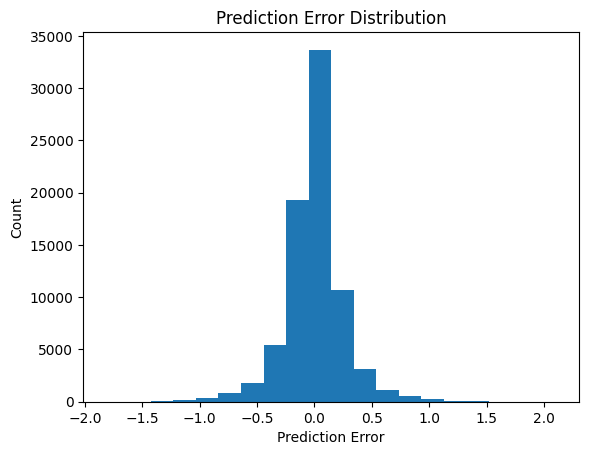

time: 532 ms (started: 2023-12-27 08:45:04 +00:00)


In [ ]:
df_comparison_stars['Difference'] = df_comparison_stars['original_stars'] - df_comparison_stars['predicted_stars']

# Histogram of errors
errors = df_comparison_stars["original_stars"] - df_comparison_stars["predicted_stars"]
plt.hist(errors, bins = 20)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Prediction Error Distribution")
plt.show()

<a name="references"></a>
## References

### Dataset
* USA state population: https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

* USA state average salary: https://www.sofi.com/learn/content/average-salary-in-us/

* USA business dataset: https://www.yelp.com/dataset

###Random Forest Regressor:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
https://towardsdatascience.com/random-forest-regression-5f605132d19d
https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

###Linear Regression:
https://www.youtube.com/watch?v=nk2CQITm_eo
https://www.youtube.com/watch?v=lIuo5G8ASQw
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

###Grid Search:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://towardsdatascience.com/cross-validation-and-grid-search-efa64b127c1b

###Dealing with outliers:
https://www.machinelearningplus.com/pyspark/pyspark-outlier-detection-and-treatment/